In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # to normalize the data importing scaler method
from imblearn.over_sampling import RandomOverSampler # this bascially samples the data to match the number of train and test

In [2]:
cols=['Length', 'Width', 'Size', 'Conc', 'Conc1', 'Asym', 'M3Long', 'M3Trans','Alpha', 'Dist', 'Class']
data=pd.read_csv("H:\\conda\\Machine_Learning\\magictel\\magic.data",names=cols)
data.head(5)

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
data['Class']=(data['Class']=='h').astype(int)

In [4]:
data.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


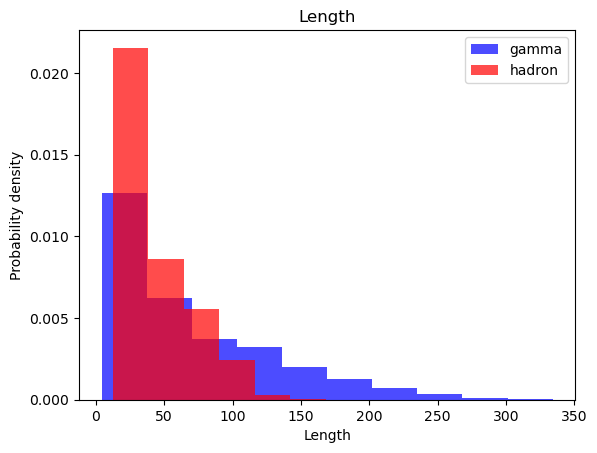

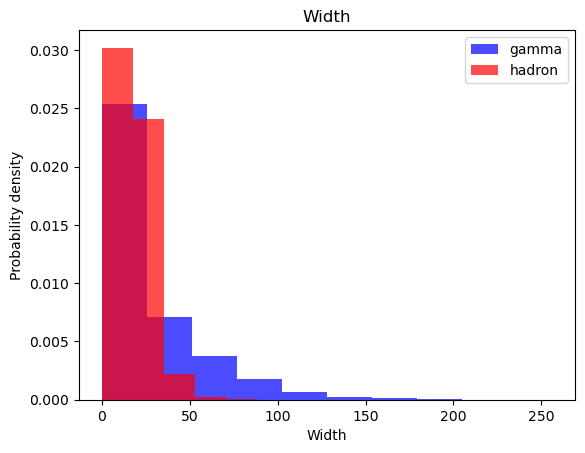

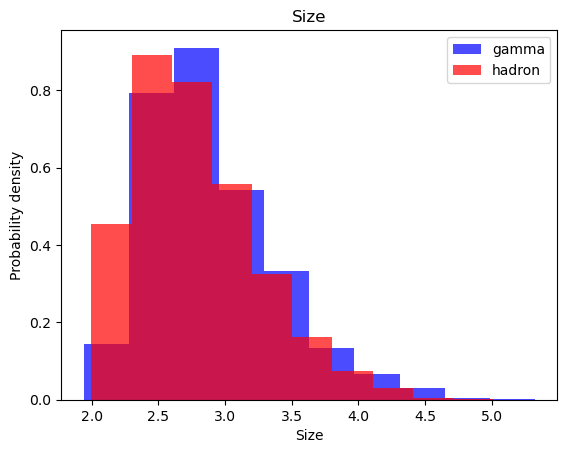

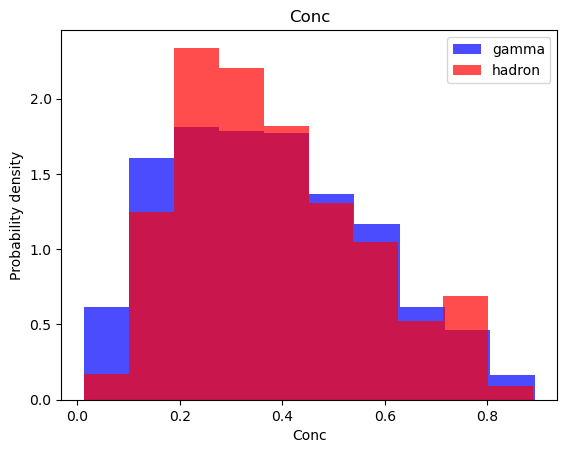

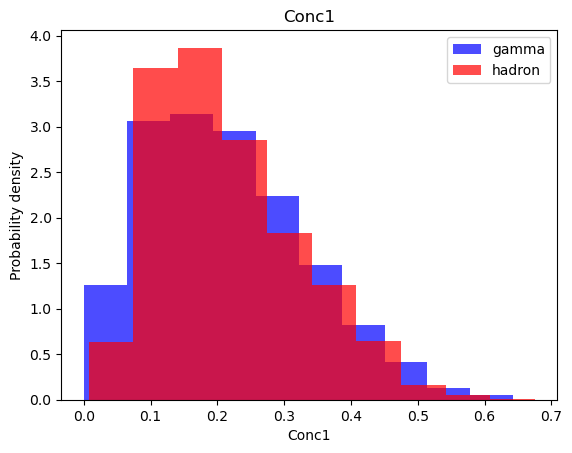

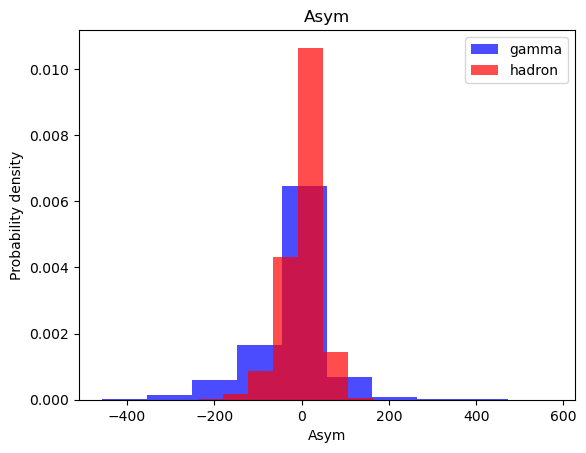

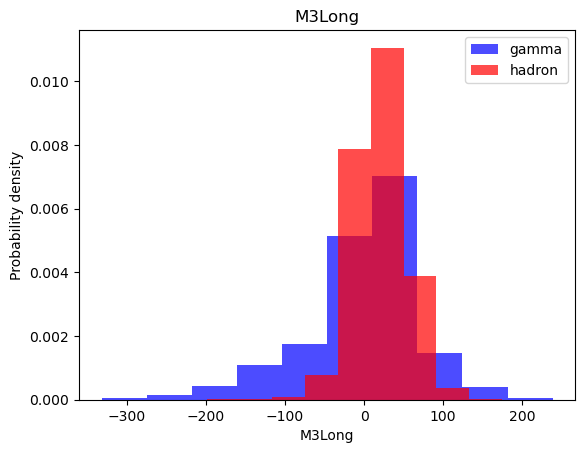

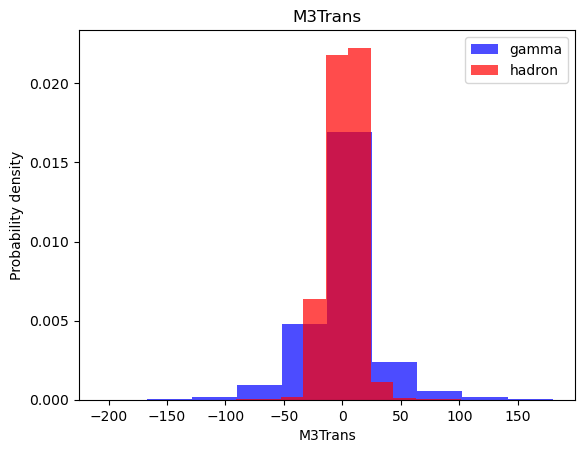

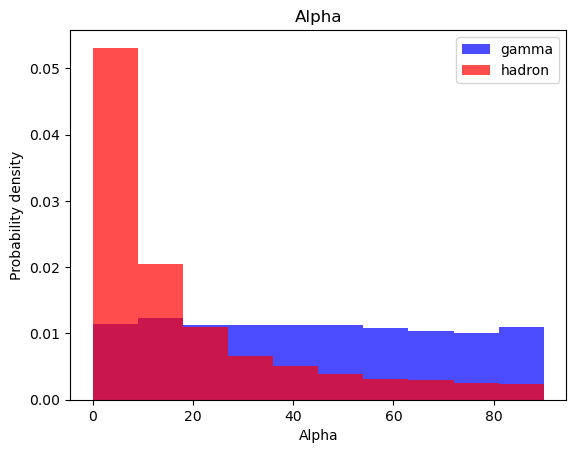

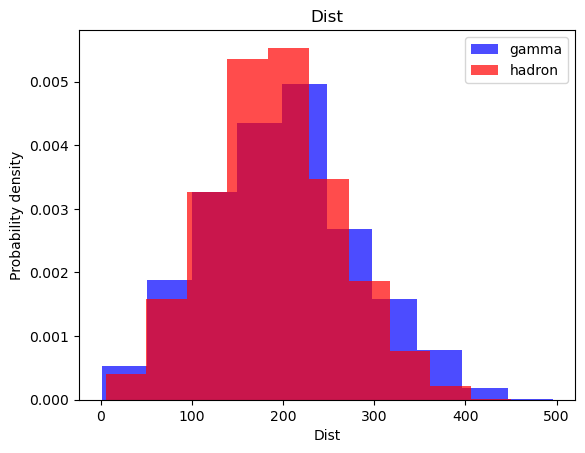

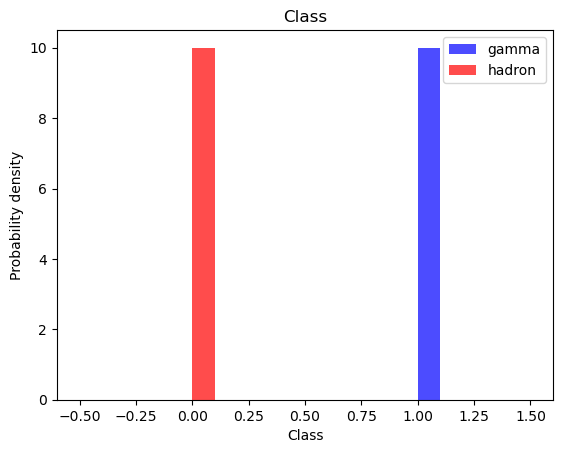

In [82]:
for feature in data[:-1]:
    plt.hist(data[data['Class']==1][feature],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(data[data['Class']==0][feature],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Probability density')
    plt.legend()
    plt.show()

### Training, Testing and Validation step

In [4]:
dummy=data.copy()

In [5]:
train,valid,test=np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))]) # frac=1 means shuffle whole 100% data

In [18]:
"""
Data Normalization
"""

'\nData Normalization\n'

In [22]:
def scale_dataset(dataframe,oversample=False): # directing to defualt mode that not to oversample initially
    x=dataframe[dataframe.columns[:-1]].values # i need all the rows from first to second last to scale
    y=dataframe[dataframe.columns[-1]].values  # this is the last column to be scales because it is target column
    
    
    scaler=StandardScaler()
    
    x=scaler.fit_transform(x)  # take x from above and fit the scaler and transform the value and supply to new x where x=0 to 1

    if oversample:
        
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y) # this is to match the number of training and testing data 
    df=np.hstack((x,np.reshape(y,(len(y),1)))) # making 2D array just for y
    
    return df,x,y 

In [17]:
#dummy.columns.values

In [7]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False) # we are putting false here bcoz, we want to test our model for 
test,x_test,y_test=scale_dataset(test,oversample=False)      # new data set

In [49]:
sum(y_train==1)

7377

In [14]:
sum(x_train)

array([1446.03205779, 1163.77954399,  569.92721059, -162.51252349,
        -75.68040168, -838.56851987, -916.37072584,  123.67266334,
       2050.21823626,  361.09706476])

In [50]:
sum(y_train==0)

7377

In [51]:
test.shape

(3804, 11)

In [52]:
train.shape

(14754, 11)

In [53]:
valid.shape

(3804, 11)

### KNN

In [ ]:
#importing knn classifier model- to reduce the effort of the code

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
## predicting
y_predict=knn_model.predict(x_test)

In [11]:
y_predict

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [13]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2477
           1       0.78      0.67      0.72      1327

    accuracy                           0.82      3804
   macro avg       0.81      0.78      0.79      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model=GaussianNB()

In [19]:
nb_model=nb_model.fit(x_train,y_train)
y_predict=nb_model.predict(x_test)

In [20]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      2477
           1       0.68      0.42      0.52      1327

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



### Logistic Regression